# Libraries

In [58]:
from _ctypes import LoadLibrary as _dlopen
_dlopen("D:\\Sangwons_Room\\00_SoftWares\\Anaconda\\envs\\torch\\Library\\bin\\geos.dll", 0)

# nuscenes-devkit
from nuscenes.nuscenes import NuScenes

# nuscenes-map expansion
from utils.custom_map_api_expansion import CustomNuScenesMap

# nuscenes-devkit-utils
from nuscenes.utils.data_classes import LidarPointCloud, RadarPointCloud, Box
from nuscenes.utils.geometry_utils import view_points, transform_matrix

from pyquaternion import Quaternion


from functools import reduce
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tqdm.notebook import tqdm

from torch.utils.data import Dataset, DataLoader
%matplotlib inline

# Set  Parameters

In [2]:
locations = ['singapore-onenorth', 'singapore-hollandvillage', 'singapore-queenstown', 'boston-seaport']
version = 'v1.0-mini'
dataroot = './data/sets/nuscenes'

# Load Informations

In [3]:
nusc = NuScenes(version=version, dataroot=dataroot, verbose=True)
nusc_location = dict()
for loc in locations:
    nusc_location[loc] = CustomNuScenesMap(dataroot=dataroot, map_name=loc)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.659 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


# Check Maps

In [4]:
# for location in locations:
#     nusc_map = nusc_location[location]
#     fig, ax = nusc_map.render_layers(nusc_map.non_geometric_layers, figsize=1)
#     ax.set_title(f"{location}, {nusc_map.get_size()}")
# plt.show()

In [5]:
# nusc_map = nusc_location['singapore-hollandvillage']

# nusc_map = nusc_location['singapore-onenorth']

# nusc_map.get_closest_layers(nusc_map.non_geometric_layers, (700.0, 1900.0))

# Data Analysis

## Total Map Analysis

In [12]:
info = []

for location in tqdm(locations, position = 0):
    nusc_map = nusc_location[location]
    map_size = nusc_map.get_size()
    
    objects_list = nusc_map.get_closest_layers(nusc_map.non_geometric_layers, (map_size[0]/2, map_size[1]/2), map_size)
    for layer in nusc_map.non_geometric_layers:
        objects = objects_list[layer]
        for object_ in objects:
            info.append([location, layer, x, y, object_.shape[0]])
                    
df = pd.DataFrame(info, columns = ['location', 'layer', 'map_x', 'map_y', 'number_of_points'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [40]:
print(df.shape)
df.head()

(17046, 5)


,location,layer,map_x,map_y,number_of_points
0,singapore-onenorth,drivable_area,3100.0,3100.0,0
1,singapore-onenorth,road_segment,3100.0,3100.0,21
2,singapore-onenorth,road_segment,3100.0,3100.0,22
3,singapore-onenorth,road_segment,3100.0,3100.0,7
4,singapore-onenorth,road_segment,3100.0,3100.0,12


In [41]:
df['location'].value_counts()

boston-seaport              6160
singapore-onenorth          4449
singapore-queenstown        3584
singapore-hollandvillage    2853
Name: location, dtype: int64

In [42]:
layer_portion = df['layer'].value_counts() / df.shape[0] * 100
layer_portion

lane             21.483046
road_block       15.704564
road_segment     12.542532
walkway          12.284407
stop_line        11.515898
lane_divider      8.829051
road_divider      4.740115
drivable_area     3.801478
traffic_light     3.719348
ped_crossing      3.302828
carpark_area      2.076734
Name: layer, dtype: float64

In [43]:
layer_portion[['road_block', 'walkway', 'road_divider', 'traffic_light']]

road_block       15.704564
walkway          12.284407
road_divider      4.740115
traffic_light     3.719348
Name: layer, dtype: float64

In [82]:
gdf

location                  layer        
boston-seaport            lane             1215
                          road_block        969
                          road_segment      928
                          stop_line         775
                          lane_divider      671
                          road_divider      377
                          ped_crossing      340
                          traffic_light     307
                          walkway           301
                          carpark_area      275
                          drivable_area       2
singapore-hollandvillage  lane              601
                          walkway           498
                          drivable_area     426
                          road_block        387
                          stop_line         300
                          lane_divider      220
                          road_segment      167
                          traffic_light     119
                          road_divider      107


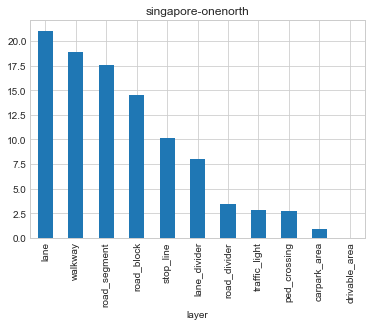

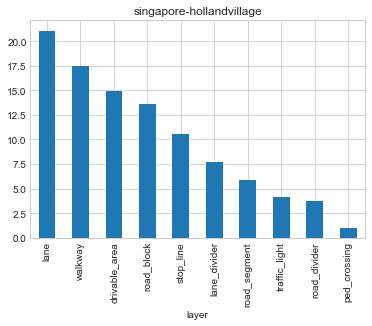

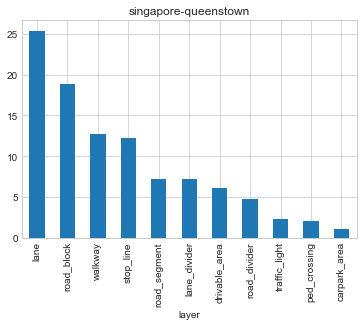

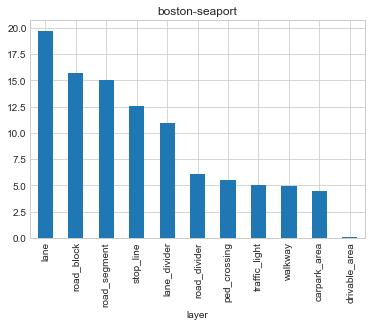

In [98]:
gdf = df.groupby('location')['layer'].value_counts()
for location in locations:
    loc_percent = gdf[location] / gdf[location].sum() * 100
    plt.figure()
    plt.title(location)
    loc_percent.plot(kind = 'bar')
plt.show()

In [99]:
df.groupby('layer')['number_of_points'].mean()

layer
carpark_area        4.709040
drivable_area       0.000000
lane               12.342163
lane_divider        3.973422
ped_crossing        4.010657
road_block       2666.615988
road_divider        3.908416
road_segment       20.472404
stop_line           4.605196
traffic_light       2.000000
walkway            17.423591
Name: number_of_points, dtype: float64

In [29]:
df.groupby('layer')['number_of_points'].min()

layer
carpark_area     4
drivable_area    0
lane             4
ped_crossing     4
road_block       4
road_segment     4
stop_line        4
walkway          4
Name: number_of_points, dtype: int64

In [30]:
df.groupby('layer')['number_of_points'].max()

layer
carpark_area      22
drivable_area      0
lane             249
ped_crossing      10
road_block       126
road_segment     152
stop_line         12
walkway          149
Name: number_of_points, dtype: int64